# Data Source="https://www.kaggle.com/c/titanic-gettingStarted"

In [1]:
import pandas as pd

In [2]:
titanic_df=pd.read_csv("train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


First some basic questions:
    
1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

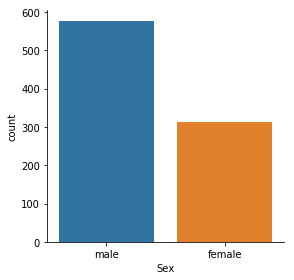

In [6]:
# Let's first check gender
sns.factorplot(x="Sex",data=titanic_df,kind='count')

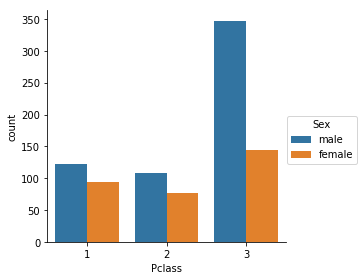

In [7]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!

sns.factorplot(x='Pclass',data=titanic_df,kind='count',hue='Sex')

In [8]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex
def male_female_child(passenger):
    Age,Sex=passenger
    if Age < 16:
        return 'Child'
    else:
        return Sex
    
# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['Person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


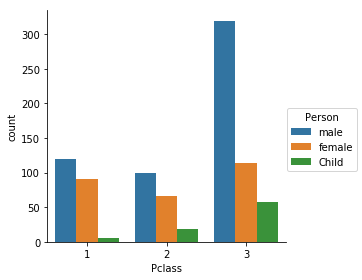

In [10]:
sns.factorplot(x='Pclass',data=titanic_df,kind='count',hue='Person')

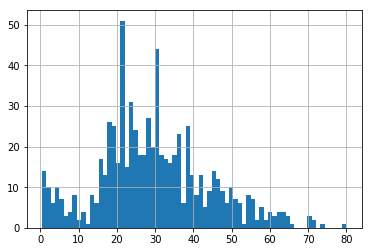

In [11]:
# Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [12]:
# We could also get a quick overall comparison of male,female,child
titanic_df['Person'].value_counts()

male      537
female    271
Child      83
Name: Person, dtype: int64

Text(0.5,1,'SEX RATIO GRAPH')

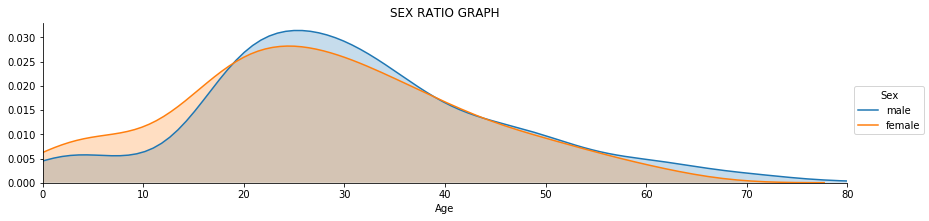

In [13]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest=titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

plt.title("SEX RATIO GRAPH")

Text(0.5,1,'PERSON RATIO GRAPH')

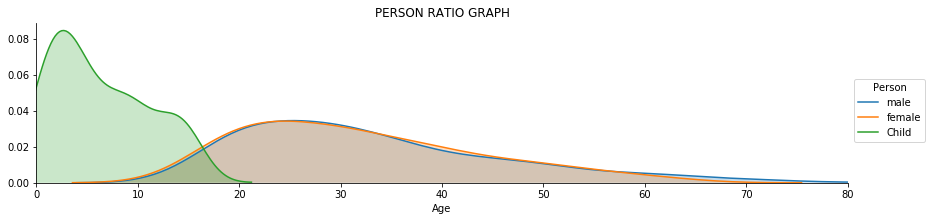

In [14]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig=sns.FacetGrid(titanic_df,hue='Person',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest=titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

plt.title("PERSON RATIO GRAPH",loc='center')

Text(0.5,1,'PASSENGERS CLASS RATIO GRAPH')

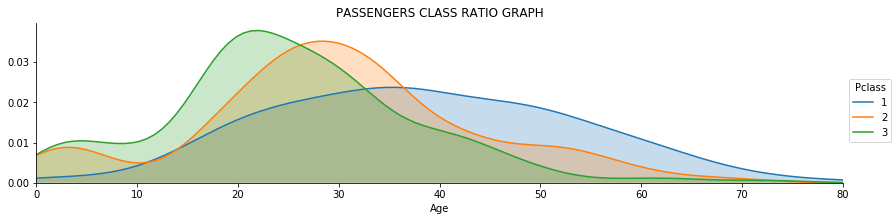

In [15]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest=titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

plt.title("PASSENGERS CLASS RATIO GRAPH")

# 2.) What deck were the passengers on and how does that relate to their class?

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [17]:
# First we'll drop the NaN values and create a new object, deck
deck=titanic_df['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

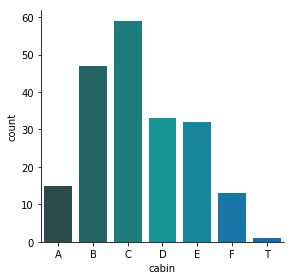

In [19]:
levels=[]

# Loop to grab first letter
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df=pd.DataFrame(levels)
cabin_df.columns=["cabin"]
sns.factorplot(x="cabin",data=cabin_df,kind='count',palette='winter_d',order=['A','B','C','D','E','F','T'])

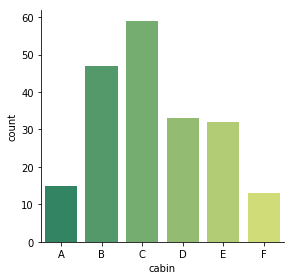

In [20]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df=cabin_df[cabin_df.cabin != 'T']

sns.factorplot(x="cabin",data=cabin_df,kind='count',palette='summer',order=['A','B','C','D','E','F'])

for plotting coluring option check out the below link
"http://matplotlib.org/users/colormaps.html"

# 3.) Where did the passengers come from?

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


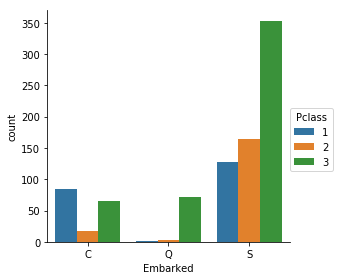

In [22]:
sns.factorplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

C = Cherbourg, Q = Queenstown, S = Southampton

Text(0.5,1,'NUMBER OF PASSENGERS')

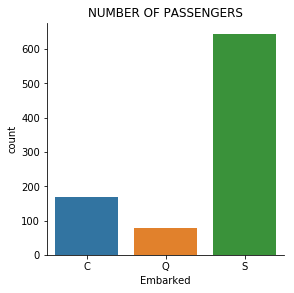

In [23]:
#count number of passenger for each 
sns.factorplot(x="Embarked",data=titanic_df,kind='count',order=['C','Q','S'])
plt.title("NUMBER OF PASSENGERS")

In [24]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# 4.) Who was alone and who was with family?

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [26]:
titanic_df['Family_Details']=titanic_df.SibSp + titanic_df.Parch

In [27]:
titanic_df['Family_Details']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Family_Details, Length: 891, dtype: int64

In [28]:
titanic_df['Family_Details'].loc[titanic_df['Family_Details'] > 0] = 'With Family'

titanic_df['Family_Details'].loc[titanic_df['Family_Details'] == 0] = 'Alone'

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_Details
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Text(0.5,1,'FAMILT DETAILS ON THE BOAT')

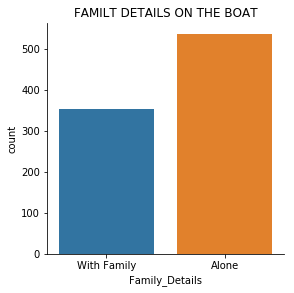

In [30]:
sns.factorplot(x='Family_Details',data=titanic_df,kind='count')

plt.title("FAMILT DETAILS ON THE BOAT")

In [31]:
titanic_df['Family_Details'].value_counts()

Alone          537
With Family    354
Name: Family_Details, dtype: int64

# 5.) What factors helped someone survive the sinking?

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_Details
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


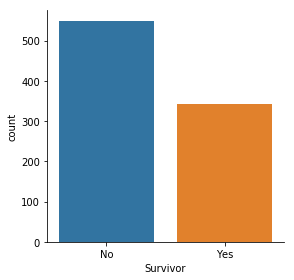

In [33]:
titanic_df['Survivor']=titanic_df.Survived.map({0: "No", 1: "Yes"})

sns.factorplot(x="Survivor",data=titanic_df,kind='count')

In [34]:
titanic_df['Survivor'].value_counts()

No     549
Yes    342
Name: Survivor, dtype: int64

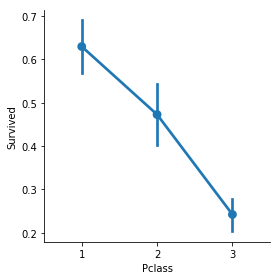

In [37]:
sns.factorplot(x='Pclass',y='Survived',data=titanic_df)

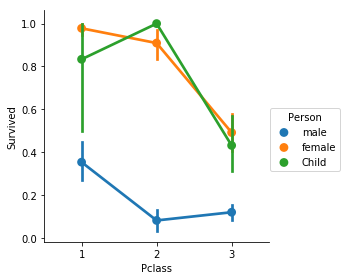

In [38]:
sns.factorplot(x='Pclass',y='Survived',hue='Person',data=titanic_df)

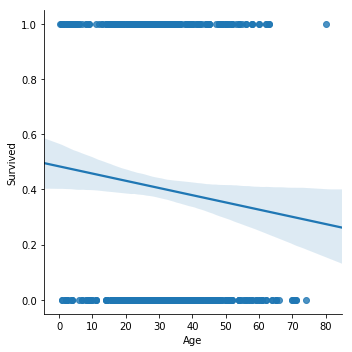

In [40]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

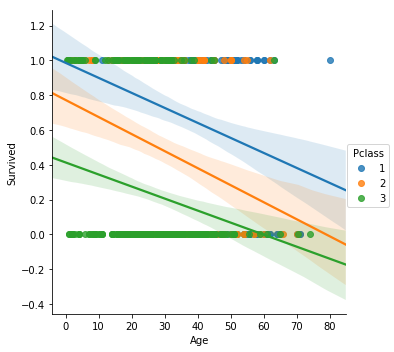

In [41]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df)

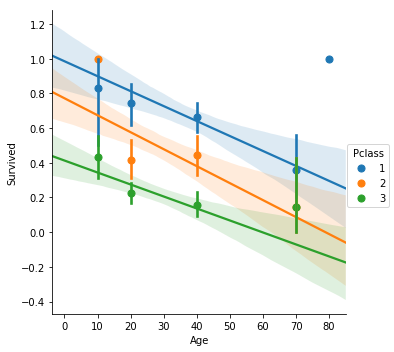

In [42]:
generation=[10,20,40,70,80]

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,x_bins=generation)

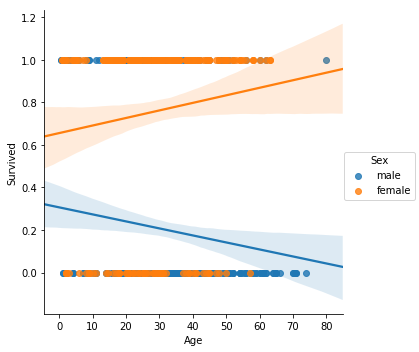

In [43]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df)

# LET'S PLAY TITANIC HEART TOUCHING SONGS

# "https://www.youtube.com/watch?v=DIQQfo3ZAvo"